# Credit Cards Defaults

The dataset for this assignment was collected in Taiwan in 2005, when the credit card issuers faced the cash and credit card debt crisis. In order to increase market share, card-issuing banks over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and was a big challenge for both banks and cardholders.

 The data were collected from an important bank (a cash and credit card issuer) in Taiwan and the targets were credit card holders of the bank. Variables the dataset contains are:

 · LIMIT_BAL: credit limit in NT dollars (including for client's family)

 · GENDER: 1 = male, 2 = female

 · EDUCATION: 0 = doctorate, 1 = masters; 2 = bachelor; 3 = school graduate; 4 = elementary education; 5= other; 6 = no data.

 · MARITAL: marital status: 0 = no answer; 1 = married; 2 = single; 3 = no data.

 · AGE: age in years

 · PAY_APR – PAY_SEP : history of past monthly payments, from April (PAY_APR) to September (PAY_SEP) 2005. The measurement scale for the repayment status is 0 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

 · BILL_APR – BILL_SEP: the amount of bill statement (NT dollars) each month

 · PAY_APR – PAY_SEP: the amount of previous payment (NT dollar)

 · default: binary indicator of a default (1 = Yes, 0 = No)

 We would like to explore whether there are differences between customers who defaulted and did not.

### Data preparation

In [169]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bootstrap_stat import bootstrap_stat as bp

%matplotlib inline

In [170]:
dataset = pd.read_csv('credit_card_default_analysis.csv')

In [171]:
dataset.head(5)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   GENDER     30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARITAL    30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_SEP    30000 non-null  int64
 7   PAY_AUG    30000 non-null  int64
 8   PAY_JUL    30000 non-null  int64
 9   PAY_JUN    30000 non-null  int64
 10  PAY_MAY    30000 non-null  int64
 11  PAY_APR    30000 non-null  int64
 12  BILL_SEP   30000 non-null  int64
 13  BILL_AUG   30000 non-null  int64
 14  BILL_JUL   30000 non-null  int64
 15  BILL_JUN   30000 non-null  int64
 16  BILL_MAY   30000 non-null  int64
 17  BILL_APR   30000 non-null  int64
 18  PAY_SEP.1  30000 non-null  int64
 19  PAY_AUG.1  30000 non-null  int64
 20  PAY_JUL.1  30000 non-null  int64
 21  PAY_JUN.1  3

In [173]:
dataset.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [174]:
dataset.index = dataset['ID']

In [175]:
dataset.drop('ID',axis=1,inplace=True)

In [176]:
dataset.head(5)

,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [177]:
dataset.isnull().sum()


LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
PAY_SEP      0
PAY_AUG      0
PAY_JUL      0
PAY_JUN      0
PAY_MAY      0
PAY_APR      0
BILL_SEP     0
BILL_AUG     0
BILL_JUL     0
BILL_JUN     0
BILL_MAY     0
BILL_APR     0
PAY_SEP.1    0
PAY_AUG.1    0
PAY_JUL.1    0
PAY_JUN.1    0
PAY_MAY.1    0
PAY_APR.1    0
default      0
dtype: int64

In [178]:
dataset = dataset.rename(columns={'PAY_APR.1': 'AMT_PAY_APR', 'PAY_MAY.1': 'AMT_PAY_MAY', 'PAY_JUN.1': 'AMT_PAY_JUN', 'PAY_JUL.1': 'AMT_PAY_JUL', 'PAY_AUG.1': 'AMT_PAY_AUG', 'PAY_SEP.1': 'AMT_PAY_SEP'})
dataset_default = dataset[dataset['default'] == 1]
dataset_no_default = dataset[dataset['default'] == 0]

In [179]:
dataset_default

,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,AMT_PAY_SEP,AMT_PAY_AUG,AMT_PAY_JUL,AMT_PAY_JUN,AMT_PAY_MAY,AMT_PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
14,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
17,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
22,120000,2,2,1,39,0,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29998,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [180]:
dataset_no_default

,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,AMT_PAY_SEP,AMT_PAY_AUG,AMT_PAY_JUL,AMT_PAY_JUN,AMT_PAY_MAY,AMT_PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,140000,1,2,1,41,0,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29993,10000,1,3,1,43,0,0,0,0,0,...,0,0,0,2000,0,0,0,0,0,0
29994,100000,1,1,2,38,0,0,0,0,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0


##  1. Credit limit: test whether there are differences between median credit limits of two groups.

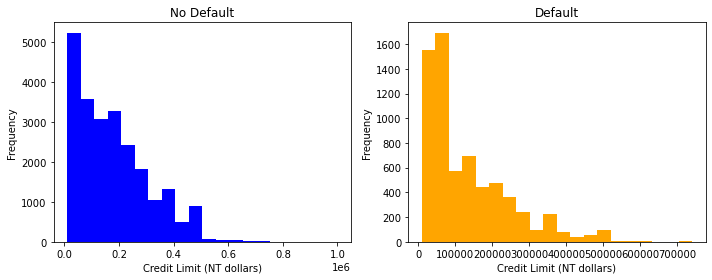

In [181]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(dataset_no_default['LIMIT_BAL'], bins=20, color='blue')
plt.title('No Default')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dataset_default['LIMIT_BAL'], bins=20, color='orange')
plt.title('Default')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='default', ylabel='LIMIT_BAL'>

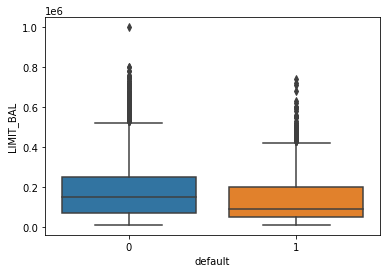

In [182]:
sns.boxplot(x='default', y='LIMIT_BAL',data=dataset)

In [183]:
def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples

In [184]:
data_limit_d = dataset_default['LIMIT_BAL'].values
data_limit_nod = dataset_no_default['LIMIT_BAL'].values

In [185]:
np.random.seed(0)

limit_d_median = list(map(np.median, get_bootstrap_samples(data_limit_d, 10000)))
limit_nod_median = list(map(np.median, get_bootstrap_samples(data_limit_nod, 10000)))

print("95% confidence interval for the Limit balance for clients with default:",  percentile_interval(limit_d_median, 0.05))
print("95% confidence interval for the Limit balance for clients without default:",  percentile_interval(limit_nod_median, 0.05))

95% confidence interval for the Limit balance for clients with default: [80000. 90000.]
95% confidence interval for the Limit balance for clients without default: [150000. 150000.]


In [186]:
print("Estimated difference between limit balance for non-default and default:", 
      np.median(data_limit_nod) - np.median(data_limit_d))

Estimated difference between limit balance for non-default and default: 60000.0


In [187]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(limit_d_median, limit_nod_median)))
print("95% confidence interval for the difference between limit balance for non-default and default:",  
      percentile_interval(delta_median_scores, 0.05))

95% confidence interval for the difference between limit balance for non-default and default: [60000. 70000.]


In [188]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(dataset_default['LIMIT_BAL'], dataset_no_default['LIMIT_BAL'])
print('Statistics=%.1f, p=%.5f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Statistics=59257217.5, p=0.00000
Reject H0


In [189]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data_limit_d, data_limit_nod, method='asymptotic')
print('Statistics=%.1f, p=%.5f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Statistics=59257217.5, p=0.00000
Reject H0


Clients with default have lower Limit Balance.

## 2. Gender: test whether gender composition of two groups differ.

GENDER: 1 = male, 2 = female

In [190]:
from statsmodels.stats.proportion import proportion_confint, proportions_ztest, \
confint_proportions_2indep, test_proportions_2indep

In [191]:
x = pd.crosstab(dataset['GENDER'], dataset['default'])
print(x)

default      0     1
GENDER              
1         9015  2873
2        14349  3763


<AxesSubplot:xlabel='GENDER', ylabel='count'>

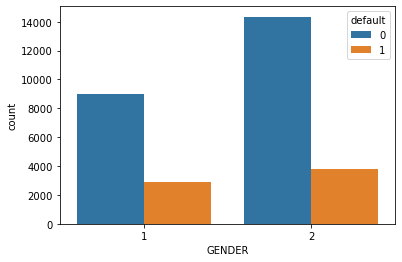

In [192]:
sns.countplot(x='GENDER', data=dataset,hue="default")

<AxesSubplot:xlabel='GENDER', ylabel='LIMIT_BAL'>

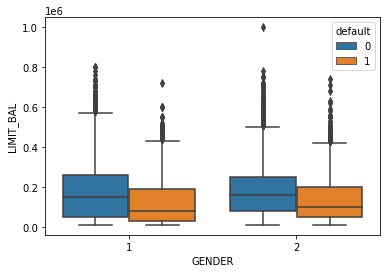

In [193]:
sns.boxplot(x='GENDER',hue='default', y='LIMIT_BAL', data=dataset)

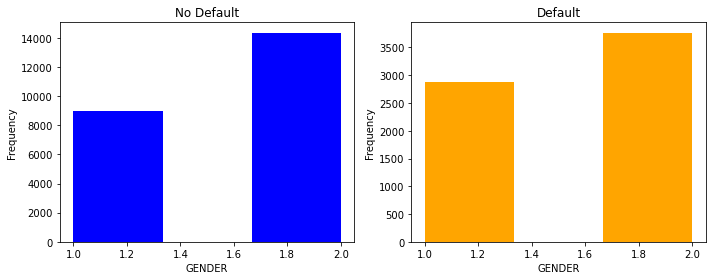

In [194]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.hist(dataset_default['GENDER'], bins=3, color='orange')
plt.title('Default')
plt.xlabel('GENDER')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
plt.hist(dataset_no_default['GENDER'], bins=3, color='blue')
plt.title('No Default')
plt.xlabel('GENDER')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

H0: prop1 - prop2 - value = 0
H1: prop1 - prop2 - value != 0

In [195]:
print("Wald's interval:",
      confint_proportions_2indep(
          dataset_default[dataset_default['GENDER'] == 1].shape[0],
          dataset_default.shape[0],
          dataset_no_default[dataset_no_default['GENDER'] == 1].shape[0],
          dataset_no_default.shape[0],
          method = 'wald', compare='diff'))

Wald's interval: (0.03363493274962867, 0.060548077974896725)


In [196]:
stat, p = test_proportions_2indep(
    dataset_default[dataset_default['GENDER'] == 1].shape[0],
    dataset_default.shape[0],
    dataset_no_default[dataset_no_default['GENDER'] == 1].shape[0],
    dataset_no_default.shape[0],
    alternative = 'two-sided',
    compare='diff',
    method = 'Wald',  return_results=False)

print("p-value: ", p)
if p < 0.025:
    print("Reject H0")
else:
    print("Cannot reject H0")

p-value:  6.9379488648039966e-12
Reject H0


Males often have a default than women's.

## 3. Education: test whether education levels differs between two groups. If it does, then how exactly?

EDUCATION: 0 = doctorate, 1 = masters; 2 = bachelor; 3 = school graduate; 4 = elementary education; 5= other; 6 = no data.

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

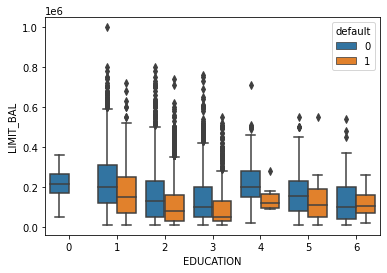

In [197]:
sns.boxplot(x='EDUCATION',hue='default', y='LIMIT_BAL',data=dataset)

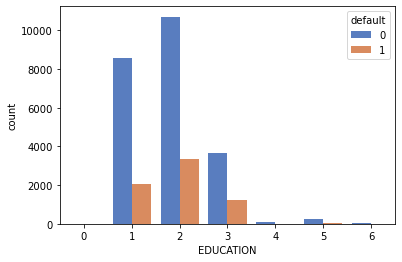

In [198]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="default", palette="muted")

In [199]:
x = pd.crosstab(dataset['EDUCATION'], dataset['default'])
print(x)

default        0     1
EDUCATION             
0             14     0
1           8549  2036
2          10700  3330
3           3680  1237
4            116     7
5            262    18
6             43     8


In [200]:
print(stats.chi2_contingency(pd.crosstab(dataset['EDUCATION'], dataset['default'])))

(163.21655786997073, 1.2332626245415605e-32, 6, array([[1.0903200e+01, 3.0968000e+00],
       [8.2435980e+03, 2.3414020e+03],
       [1.0926564e+04, 3.1034360e+03],
       [3.8293596e+03, 1.0876404e+03],
       [9.5792400e+01, 2.7207600e+01],
       [2.1806400e+02, 6.1936000e+01],
       [3.9718800e+01, 1.1281200e+01]]))


In [201]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(dataset['EDUCATION'], dataset['default']))
print('p-value:', p)

p-value: 1.2332626245415605e-32


If the p-value is less than a significance level (usually 0.05), then you can reject the null hypothesis and conclude that there is a significant association between education level and default status. This means that the education levels differ between the two groups of credit card holders.

In [202]:
print('Pearson residuals for EDUCATION', stats.chi2_contingency(x, correction=False)[3])

Pearson residuals for EDUCATION [[1.0903200e+01 3.0968000e+00]
 [8.2435980e+03 2.3414020e+03]
 [1.0926564e+04 3.1034360e+03]
 [3.8293596e+03 1.0876404e+03]
 [9.5792400e+01 2.7207600e+01]
 [2.1806400e+02 6.1936000e+01]
 [3.9718800e+01 1.1281200e+01]]


With increasing levels of higher education defaults observed less often.

## 4. Marital status: Check how marital status is related to the default indicator: you need to propose a measure by which you can measure the possible relationship of these variables and calculate its value.

MARITAL: marital status: 0 = no answer; 1 = married; 2 = single; 3 = no data.

<AxesSubplot:xlabel='MARITAL', ylabel='LIMIT_BAL'>

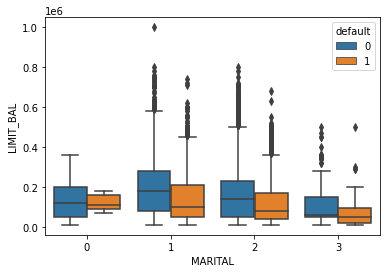

In [203]:
sns.boxplot(x='MARITAL',hue='default', y='LIMIT_BAL',data=dataset)

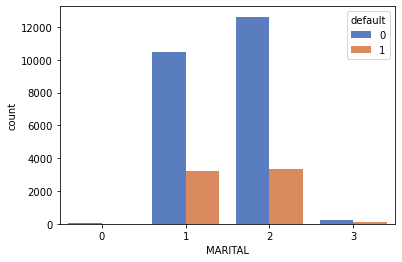

In [204]:
g=sns.countplot(x="MARITAL", data=dataset,hue="default", palette="muted")

In [205]:
x = pd.crosstab(dataset['MARITAL'], dataset['default'])
print(x)

default      0     1
MARITAL             
0           49     5
1        10453  3206
2        12623  3341
3          239    84


In [206]:
print(stats.chi2_contingency(pd.crosstab(dataset['MARITAL'], dataset['default'])))

(35.66239583433609, 8.825862457577375e-08, 3, array([[4.20552000e+01, 1.19448000e+01],
       [1.06376292e+04, 3.02137080e+03],
       [1.24327632e+04, 3.53123680e+03],
       [2.51552400e+02, 7.14476000e+01]]))


In [207]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(dataset['MARITAL'], dataset['default']))
print('p-value:', p)

p-value: 8.825862457577375e-08


In [208]:
print('Pearson residuals for EDUCATION', stats.chi2_contingency(x, correction=False)[3])

Pearson residuals for EDUCATION [[4.20552000e+01 1.19448000e+01]
 [1.06376292e+04 3.02137080e+03]
 [1.24327632e+04 3.53123680e+03]
 [2.51552400e+02 7.14476000e+01]]


Married peoples more offen have a default.

## 5. Age: test whether there are differences between mean ages of clients in two groups.

<AxesSubplot:xlabel='default', ylabel='AGE'>

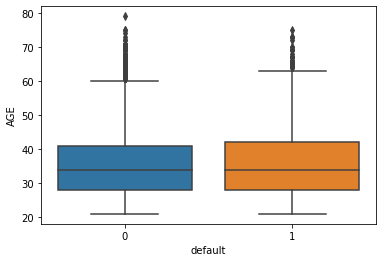

In [209]:
sns.boxplot(x='default', y='AGE',data=dataset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

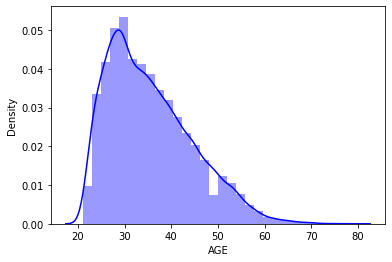

In [210]:
sns.distplot(dataset_no_default['AGE'],kde=True,bins=30, color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

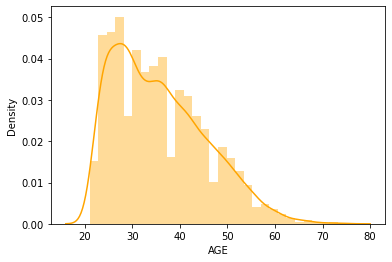

In [211]:
sns.distplot(dataset_default['AGE'],kde=True,bins=30, color='orange')

In [212]:
data_age_d = dataset_default['AGE'].values
data_age_nod = dataset_no_default['AGE'].values

In [213]:
np.random.seed(0)

age_d_median = list(map(np.median, get_bootstrap_samples(data_age_d, 10000)))
age_nod_median = list(map(np.median, get_bootstrap_samples(data_age_nod, 10000)))

print("95% confidence interval for the Age for clients with default:",  percentile_interval(age_d_median, 0.05))
print("95% confidence interval for the Age for clients without default:",  percentile_interval(age_nod_median, 0.05))

95% confidence interval for the Age for clients with default: [34. 35.]
95% confidence interval for the Age for clients without default: [34. 34.]


In [214]:
print("Estimated difference between Age for non-default and default:", 
      np.median(data_age_nod) - np.median(data_age_d))

Estimated difference between Age for non-default and default: 0.0


In [215]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(age_d_median, age_nod_median)))
print("95% confidence interval for the difference between Age for non-default and default:",  
      percentile_interval(delta_median_scores, 0.05))

95% confidence interval for the difference between Age for non-default and default: [-1.  0.]


In [216]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data_age_d, data_age_nod, method='asymptotic')
print('Statistics=%.1f, p=%.5f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Statistics=78076624.5, p=0.37250
Fail to reject H0


So, there are no difference in the age between two grouprs.